In [1]:
import random
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import seaborn as sns

In [4]:
class Dealer:
    
    def __init__(self):
        pass

    def create_single_deck(self):
        
        unique_cards_within_deck = [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 'A']
        unshuffled_card_deck = []
        # create card deck
        for i in range(4):
            for i in unique_cards_within_deck:
                unshuffled_card_deck.append(i)
                
        return unshuffled_card_deck

    def create_multi_deck(self, unshuffled_card_deck):
        
        multi_deck = []
        # add additional decks - for Encore, we will add 6 decks
        for i in range(6):
            for i in unshuffled_card_deck:
                multi_deck.append(i)

        return multi_deck

    def shuffle_deck(self, multi_deck):
        
        random.shuffle(multi_deck)

        return multi_deck

    def cut_deck(self, multi_deck):
        
        # generate random slice number to cut deck
        min_slice = 4.25 * 52
        max_slice = 4.75 * 52
        list_slice = random.randrange(min_slice, max_slice)
        # cut deck
        cut_deck = multi_deck[:list_slice]

        return cut_deck

    def deal_card(self, deck, cards):

        # select 1st card from deck
        deal_card = deck[:1]
        # add 1st card from deck to player cards (we use a loop to remove the item from the deal_card list)
        for i in deal_card:
            cards.append(i)
        # delete 1st card from deck
        del(deck[:1])

        return cards

    # def deal_card_to_dealer(self, cut_deck, dealer_cards):

    #     # select 1st card from deck
    #     deal_card = cut_deck[:1]
    #     # add 1st card from deck to player cards (we use a loop to remove the item from the deal_card list)
    #     for i in deal_card:
    #         dealer_cards.append(i)
    #     # delete 1st card from deck
    #     del(cut_deck[:1])

    #     return dealer_cards

In [13]:
class Strategy(Dealer):

    def __init__(self, bet, blackjack_payout, portfolio, surrender_loss):
        self.bet = bet
        self.blackjack_payout = blackjack_payout
        self.portfolio = portfolio
        self.surrender_loss = surrender_loss

    # def load_strategy(self):
        
    #     # import strategy csv
    #     strategy = pd.read_csv('policy.csv')
    #     # rename columns
    #     strategy.columns = ['Player-Dealer', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'A']
    #     # set index
    #     strategy = strategy.set_index('Player-Dealer')
        
    #     return strategy

    def check_ace(self, player_cards):
        
        index_value = None

        # check for ace
        ace_boolean = False
        # check for ace within list
        for i in player_cards:
            if i == 'A':
                ace_boolean = True
        
        # sum cards if ace isn't there
        if ace_boolean == False:
            index_value = sum(player_cards)
            return index_value

        # list for all integer cards
        aceless_list = []
        # count aces
        ace_tally = 0

        # process if there is an ace
        if ace_boolean == True:            
            # add integer cards to list
            for i in player_cards:
                if i != 'A':
                    aceless_list.append(i)
                if i == 'A':
                    ace_tally += 1
            
            # check if there is more than 1 ace -> excess aces count as 1
            if ace_tally > 1:
                ace_excess = ace_tally - 1
                aceless_list.append(ace_excess)
            # sum all non aces
            sum_cards = sum(aceless_list)
            # if greater than 21, ace = 1
            if sum_cards + 11 > 21:
                index_value = sum_cards + 1
            # if not, refer to A,n decision rule
            else:
                index_value = f'A,{sum_cards}'

            return index_value

        else:
            return 'Nothing Returned'

    def get_strategy_decision(self, player_cards, dealer_cards, strategy_df):

        # strategy = load_strategy()
                
        player_card_1 = player_cards[0]
        player_card_2 = player_cards[1]
        index_value = None
        bust_value = None
        
        # identify what player card's index value is to search df index
        if len(player_cards) == 2:
            if player_card_1 == player_card_2:
                index_value = f'{player_card_1},{player_card_2}'
            elif player_card_1 == 'A' or player_card_2 == 'A':
                if player_card_1 == 'A':
                    index_value = f'{player_card_1},{player_card_2}'
                if player_card_2 == 'A':
                    index_value = f'{player_card_2},{player_card_1}'
            else:
                index_value = sum(player_cards)

        else:
            index_value = self.check_ace(player_cards)

        # if type(index_value) == int:
        if isinstance(index_value, int) == True:
            if index_value > 21:
                # bust_value = True
                return 'Bust'
        
        index_value = str(index_value)
        dealer_card_1 = f'{dealer_cards[0]}'
        # print(strategy.iloc[index_value, dealer_card_1])
        # strategy = self.load_strategy()
        # decision = strategy._get_value(index_value, dealer_card_1)
        decision = strategy_df.loc[index_value][dealer_card_1]
        
        return decision

    def hit(self, deck, player_cards):
        
        player_cards = self.deal_card(deck, player_cards)
        # index = self.check_ace(player_cards)
        # decision = self.get_strategy_decision(player_cards, dealer_cards)

        # return [player_cards, decision]
        return player_cards

    # def double(self, player_cards):
    #     pass

    def split(self, player_cards, dealer_cards):
        pass
        # create list of decks

    # def surrender(self, player_cards, dealer_cards):
        
    #     surrender_value = True
    #     return surrender_value



    # def get_payout(self, player_cards, dealer_cards, bust_value, surrender_value, blackjack_value):

    #     if surrender_value == True:
    #         pass

        # bust (player or dealer), beat/lose the dealer, surrender, double, split

In [14]:
class Payout(Strategy):

    def __init__(self):
        
        pass

    def card_score(self, cards):
        
        # check for ace
        ace_boolean = False
        # check for ace within list
        for i in cards:
            if i == 'A':
                ace_boolean = True
        
        # sum cards if ace isn't there
        if ace_boolean == False:
            score = sum(cards)
            return score

        # list for all integer cards
        aceless_list = []
        # count aces
        ace_tally = 0

        # process if there is an ace
        if ace_boolean == True:            
            # add integer cards to list
            for i in cards:
                if i != 'A':
                    aceless_list.append(i)
                if i == 'A':
                    ace_tally += 1

            if ace_tally == 1:
                temp_score = sum(aceless_list) + 11
                if temp_score > 21:
                    score = sum(aceless_list) + 1
                else:
                    score = temp_score
                    print(score)
            else:
                score = sum(aceless_list) + 11 + ace_tally - 1
        
            return score
             
    def blackjack_value(self, cards):

        if len(cards) == 2:
            if self.card_score(cards) == 21:
                return True

        else:
            return False

    def bust(self, card_score):
        
        if card_score > 21:
            return True
        else:
            return False

    def win_loss(self, player_score, dealer_score, player_bust, dealer_bust, bet):

        payout = None

        # both bust
        if player_bust == True and dealer_bust == True:
            payout = 0
            return payout
        # player busts and dealer doesn't
        elif player_bust == True and dealer_bust == False:
            payout = bet
            return payout
        # dealer busts and player doesn't
        elif player_bust == False and dealer_bust == True:
            payout = bet * -1
            return payout
        # player and dealer tie
        elif player_score == dealer_score:
            payout = 0
            return payout
        # player wins
        elif player_score > dealer_score:
            payout = bet * -1
            return payout
        # dealer wins
        elif player_score < dealer_score:
            payout = bet
            return payout
        else:
            return 'Error'

    def blackjack_payout_function(self, blackjack_player, blackjack_dealer, bet, blackjack_payout_ratio):
        # player gets blackjack
        if blackjack_player == True and blackjack_dealer == False:

            payout = bet * -1 * blackjack_payout_ratio
            return payout

        # dealer gets black jack
        elif blackjack_player == False and blackjack_dealer == True:

            payout = bet
            return payout

        # push
        elif blackjack_player == True and blackjack_dealer == True:

            payout = 0
            return payout

        # no blackjacks
        else:
            return None

In [15]:
class Dealer_strategy(Payout):

    def __init__(self):
        
        pass
    
    def dealer_strategy(self, deck, dealer_cards):

        card_count = self.card_score(dealer_cards)
        print(card_count)

        while card_count < 17:
            self.hit(deck, dealer_cards)
            card_count = self.card_score(dealer_cards)

        return dealer_cards

dealer hand: [8, 9]
player hand dict: [{'player hand': [7, 7], 'decision': 'P', 'bet': -50}]
deck: [10, 'A', 7, 6, 5, 4, 7, 6, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
decision iteration: P
new hands: ([7, 10], [7, 'A'])
new decisions: ('S', 'S')
[{'player hand': [7, 7], 'decision': None, 'bet': -50}, {'player hand': [7, 10], 'decision': 'S', 'bet': -50}, {'player hand': [7, 'A'], 'decision': 'S', 'bet': -50}]
decision iteration: S
decision iteration: S
17
dealer cards: [8, 9]
 blackjack player: None
 blackjack dealer: None
blackjack payout value: None
player hands list: [{'player hand': [7, 10], 'decision': 'S', 'bet': -50}, {'player hand': [7, 'A'], 'decision': 'S', 'bet': -50}]
player score: 17
dealer score: 17
player bust: False
dealer bust: False
0
300
18
player score: 18
dealer score: 17
player bust: False
dealer bust: False
50
350


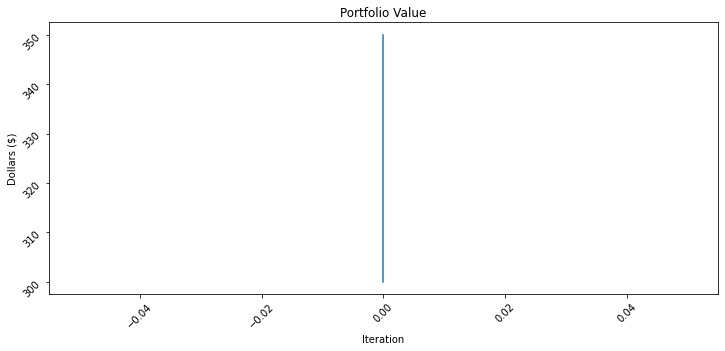

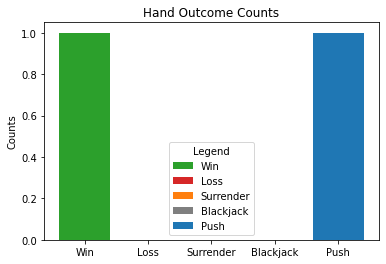

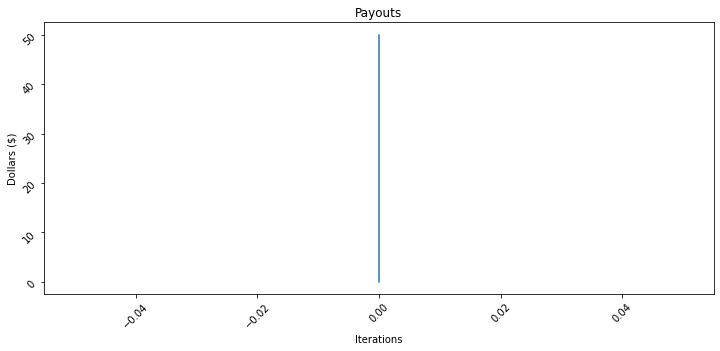

Expected Payout: 25.0
Max Drawdown: 300
Win/Loss Ratio: inf


C:\Users\angel\AppData\Local\Temp/ipykernel_36520/2798562842.py:330: RuntimeWarning: divide by zero encountered in longlong_scalars
  win_loss_ratio = portfolio_df['Win'].sum() / portfolio_df['Loss'].sum()


In [43]:
'''INSTANTIATE CLASSES'''
deck1 = Dealer()
strategy = Strategy(-25, 1.2, 300, -12.5)
dealer = Dealer_strategy()
payout_calc = Payout()

'''GLOBAL VARIABLES'''
bet = -50
blackjack_payout_ratio = 1.5
portfolio = 300
surrender_loss = -25
portfolio_df = df = pd.DataFrame([{'Payout': 0, 'Portfolio_Value': 0, 'Win': 0, 'Loss': 0, 'Surrender': 0,
                                   'Blackjack': 0, 'Push': 0, 'Dealer_Cards':0, 'Player_Cards':0}])

'''LOAD STRATEGY'''
df = pd.read_csv('policy.csv')
df.columns = ['Index', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'A']    
df.set_index('Index', inplace=True, drop=True)

'''CREATE DECK'''   
mega_deck = [10, 'A', 7, 6, 5, 4, 7, 6, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

'''RUN MONTE CARLO SIMULATION'''
for monte_carlo_index, i in enumerate(range(1)):

    '''DEAL CARDS'''
    # player_hand = [6, 5]
    player_hand = [7, 7]
    dealer_hand = [8, 9]

    # create dictionary for player hand, decisions, and associated bet
    hand_and_strategy_dict = {}
    hand_and_strategy_dict['player hand'] = player_hand
    decision = strategy.get_strategy_decision(player_hand, dealer_hand, df)
    hand_and_strategy_dict['decision'] = decision
    hand_and_strategy_dict['bet'] = bet

    # create list for all player hands and decisions dictionaries (in case of split)
    player_hands_list = []
    player_hands_list.append(hand_and_strategy_dict)
    
    print(f'dealer hand: {dealer_hand}')
    print(f'player hand dict: {player_hands_list}')
    print(f'deck: {mega_deck}')

    '''RUN STRATEGY'''

    # check for surrender
    if player_hands_list[0]['decision'] == 'SU':
        player_hands_list[0]['bet'] = surrender_loss
        print(f'surrender: {player_hands_list}')

    # for each player hand and decision (enumerate is for indexing)
    for index, player_dict in enumerate(player_hands_list):

        # decision iteration
        decision = player_dict['decision']
        print(f'decision iteration: {decision}')
            
        # while EACH decision is not stand or surrender
        while decision != 'S' and decision != 'SU' and decision != 'Bust':

            # split
            if decision == 'P':
                
                # player hand for this iteration
                player_hand_iteration = player_dict['player hand']
                        
                # split player hands in 2 lists
                split_hand_1 = []
                split_hand_1.append(player_hand_iteration[0])
                split_hand_2 = []
                split_hand_2.append(player_hand_iteration[-1])

                # automatically hit each split
                strategy.hit(mega_deck, split_hand_1)
                strategy.hit(mega_deck, split_hand_2)
                print(f'new hands: {split_hand_1, split_hand_2}')

                # get decision for each split
                decision_1 = strategy.get_strategy_decision(split_hand_1, dealer_hand, df)
                decision_2 = strategy.get_strategy_decision(split_hand_2, dealer_hand, df)
                print(f'new decisions: {decision_1, decision_2}')

                # with an ace split, you are only dealt 1 card
                if player_hand_iteration == ['A', 'A']:
                    decision_1 = 'S'
                    decision_2 = 'S'

                # change original hand to null so we can delete it after the loop (in order to not disrupt the loop iteration)
                player_hands_list[index]['decision'] = None

                # add new hands and decisions to player_hands_list
                new_hand_dict_1 = {}
                new_hand_dict_2 = {}

                new_hand_dict_1['player hand'] = split_hand_1
                new_hand_dict_2['player hand'] = split_hand_2
                
                new_hand_dict_1['decision'] = decision_1
                new_hand_dict_2['decision'] = decision_2

                new_hand_dict_1['bet'] = bet
                new_hand_dict_2['bet'] = bet

                player_hands_list.append(new_hand_dict_1)
                player_hands_list.append(new_hand_dict_2)
                print(player_hands_list)

                break

            if decision == 'H':

                # get player hand for this iteration
                player_hand_iteration = player_dict['player hand']
                # hit hand iteration
                strategy.hit(mega_deck, player_hand_iteration)
                # get decision
                decision = strategy.get_strategy_decision(player_hand_iteration, dealer_hand, df)
                # update player hand and decision
                player_dict['player hand'] = player_hand_iteration
                player_dict['decision'] = decision

                print(f'player dict: {player_dict}')

            # cannot surrender after hit
            if decision == 'SU':
                
                # if decision is surrender after a hit, you stand instead
                decision = 'S'
                break

            # bust
            # if decision == 'Bust':
            #     break

            if decision == 'D':
                
                # get player hand for this iteration
                player_hand_iteration = player_dict['player hand']
                # hit hand iteration
                strategy.hit(mega_deck, player_hand_iteration)
                # double bet
                player_dict['bet'] = player_dict['bet'] * 2
                print(player_dict['bet'])
                # update player hand and decision
                player_dict['player hand'] = player_hand_iteration
                player_dict['decision'] = 'S'
                break
    
    '''CHECK FOR SURRENDER'''
    if player_hands_list[0]['decision'] == 'SU':
        payout = player_hands_list[0]['bet']
        print('surrender')
        portfolio += payout
        print(f'portfolio: {portfolio}')
        print(f'payout: {payout}')

        temp = pd.DataFrame([[payout, portfolio, 0, 0, 1, 0, 0]],
                                columns=['Payout', 'Portfolio_Value', 'Win', 'Loss', 'Surrender', 'Blackjack', 'Push'],
                                index=[monte_carlo_index])
        portfolio_df = portfolio_df.append(temp)
        # portfolio_df.append({'Payout': payout, 'Portfolio_Value': portfolio, 'Win': 0,
        #                      'Loss': 0, 'Surrender': 1 ,'Blackjack': 0, 'Push': 0}, ignore_index=True)
        continue

    '''RUN DEALER STRATEGY'''
    dealer_cards = dealer.dealer_strategy(mega_deck, dealer_hand)
    print(f'dealer cards: {dealer_hand}')

    '''CHECK FOR BLACKJACK'''
    # we only need the first hand to verify if there was a blackjack, so we will not loop through all hands
    # check if first hand decision is None type - if so, there was a split, and you cannot have a blackjack
    if player_hands_list[0]['player hand'] == None:
        print('cannot have blackjack after split')
        # break
        
    else:
        # check if player or dealer have blackjack
        blackjack_player = payout_calc.blackjack_value(player_hands_list[0]['player hand'])
        blackjack_dealer = payout_calc.blackjack_value(dealer_hand)
        
        print(f' blackjack player: {blackjack_player}')
        print(f' blackjack dealer: {blackjack_dealer}')

        blackjack_payout_value = payout_calc.blackjack_payout_function(blackjack_player, blackjack_dealer, bet, blackjack_payout_ratio)

        print(f'blackjack payout value: {blackjack_payout_value}')

        # no blacjack -> do nothing
        if blackjack_payout_value == None:
            pass
        
        # calc payout if blackjack
        else:
            payout = blackjack_payout_value
            portfolio += blackjack_payout_value
            print('blackjack')
            print(payout)
            print(portfolio)
            if payout == 0:
                temp = pd.DataFrame([[payout, portfolio, 0, 0, 0, 0, 1]],
                                columns=['Payout', 'Portfolio_Value', 'Win', 'Loss', 'Surrender', 'Blackjack', 'Push'],
                                index=[monte_carlo_index])
                portfolio_df = portfolio_df.append(temp)
                # portfolio_df.append({'Payout': payout, 'Portfolio_Value': portfolio, 'Win': 0,
                #                     'Loss': 0, 'Surrender': 0 ,'Blackjack': 0, 'Push': 1}, ignore_index=True)
            if payout > 0:
                temp = pd.DataFrame([[payout, portfolio, 1, 0, 0, 1, 0]],
                                columns=['Payout', 'Portfolio_Value', 'Win', 'Loss', 'Surrender', 'Blackjack', 'Push'],
                                index=[monte_carlo_index])
                portfolio_df = portfolio_df.append(temp)
                # portfolio_df.append({'Payout': payout, 'Portfolio_Value': portfolio, 'Win': 1,
                #                     'Loss': 0, 'Surrender': 0 ,'Blackjack': 1, 'Push': 0}, ignore_index=True)
            if payout < 0:
                temp = pd.DataFrame([[payout, portfolio, 0, 1, 0, 0, 0]],
                                columns=['Payout', 'Portfolio_Value', 'Win', 'Loss', 'Surrender', 'Blackjack', 'Push'],
                                index=[monte_carlo_index])
                portfolio_df = portfolio_df.append(temp)
                # portfolio_df.append({'Payout': payout, 'Portfolio_Value': portfolio, 'Win': 0,
                #                     'Loss': 1, 'Surrender': 0 ,'Blackjack': 0, 'Push': 0}, ignore_index=True)

            # go to next simulation iteration
            continue

    '''DELETE NULL HANDS (FROM SPLIT)'''
    player_hands_list = [x for x in player_hands_list if x['decision'] != None]
    print(f'player hands list: {player_hands_list}')

    '''GET PAYOUT'''
    # loop through each player hand
    for dict in player_hands_list:

        # get player hand for this iteration
        player_hand_iteration = dict['player hand']
        bet_iteration = dict['bet']
        
        # get hand score
        player_score = payout_calc.card_score(player_hand_iteration)
        dealer_score = payout_calc.card_score(dealer_hand)
        print(f'player score: {player_score}')
        print(f'dealer score: {dealer_score}')

        # check for bust
        player_bust = payout_calc.bust(player_score)
        dealer_bust = payout_calc.bust(dealer_score)
        print(f'player bust: {player_bust}')
        print(f'dealer bust: {dealer_bust}')

        # compare scores
        payout = payout_calc.win_loss(player_score, dealer_score, player_bust, dealer_bust, bet_iteration)
        print(payout)
        
        portfolio += payout
        print(portfolio)

        if payout == 0:
            temp = pd.DataFrame([[payout, portfolio, 0, 0, 0, 0, 1]],
                                columns=['Payout', 'Portfolio_Value', 'Win', 'Loss', 'Surrender', 'Blackjack', 'Push'],
                                index=[monte_carlo_index])
            portfolio_df = portfolio_df.append(temp)
            # portfolio_df.append({'Payout': payout, 'Portfolio_Value': portfolio, 'Win': 0,
            #                     'Loss': 0, 'Surrender': 0 ,'Blackjack': 0, 'Push': 1}, ignore_index=True)
        if payout > 0:
            temp = pd.DataFrame([[payout, portfolio, 1, 0, 0, 0, 0]],
                                columns=['Payout', 'Portfolio_Value', 'Win', 'Loss', 'Surrender', 'Blackjack', 'Push'],
                                index=[monte_carlo_index])
            portfolio_df = portfolio_df.append(temp)
            # portfolio_df.append({'Payout': payout, 'Portfolio_Value': portfolio, 'Win': 1,
            #                     'Loss': 0, 'Surrender': 0 ,'Blackjack': 0, 'Push': 0}, ignore_index=True)
        if payout < 0:
            temp = pd.DataFrame([[payout, portfolio, 0, 1, 0, 0, 0]],
                                columns=['Payout', 'Portfolio_Value', 'Win', 'Loss', 'Surrender', 'Blackjack', 'Push'],
                                index=[monte_carlo_index])
            portfolio_df = portfolio_df.append(temp)

portfolio_df.head()
portfolio_df = portfolio_df.iloc[1:]

'''GENERATE GRAPHS'''
# portfolio value
plt.figure(figsize=(12,5))
plt.plot(portfolio_df['Portfolio_Value'])
plt.title('Portfolio Value')
plt.xlabel('Iteration')
plt.ylabel('Dollars ($)')
plt.tick_params(rotation=45)
plt.show()

fig, ax = plt.subplots()

data_name = ['Win', 'Loss', 'Surrender', 'Blackjack', 'Push']
win = portfolio_df['Win'].sum()
loss = portfolio_df['Loss'].sum()
surrender = portfolio_df['Surrender'].sum()
blackjack = portfolio_df['Blackjack'].sum()
push = portfolio_df['Push'].sum()
counts = [win, loss, surrender, blackjack, push]
data_label = ['Win', 'Loss', 'Surrender', 'Blackjack', 'Push']
bar_colors = ['tab:green', 'tab:red', 'tab:orange', 'tab:gray', 'tab:blue']

ax.set_facecolor('white')
ax.bar(data_name, counts, label=data_label, color=bar_colors)

ax.set_ylabel('Counts')
ax.set_title('Hand Outcome Counts')
ax.legend(title='Legend')

plt.show()

# payouts
plt.figure(figsize=(12,5))
plt.plot(portfolio_df['Payout'])
plt.title('Payouts')
plt.xlabel('Iterations')
plt.ylabel('Dollars ($)')
plt.tick_params(rotation=45)
plt.show()

'''SUMMARY STATISTICS'''
# expected payout
expected_payout = portfolio_df['Payout'].mean()
print(f'Expected Payout: {expected_payout}')

# max drawdown
max_drawdown = portfolio_df['Portfolio_Value'].min()
print(f'Max Drawdown: {max_drawdown}')

# win/loss ratio
win_loss_ratio = portfolio_df['Win'].sum() / portfolio_df['Loss'].sum()
print(f'Win/Loss Ratio: {win_loss_ratio}')

to test
- manually create test deck
- test hit
    - return bust over 21
- double
- split
    - split n times
    - ACE CAN ONLY SPLIT ONCE
- surrender
- stand
- blackjack
    - dealer bj
    - player bj
- push
    - split
    - blackjack
    - double

- CHECK EVERYTHING WITH AN ACE